# Practical Project: Saudi Arabia Rental Houses Dataset

### What determines  Saudi Home Rental Prices ?


This project aims to discover the main attributes affecting the Rental house prices in Saudi Arabia. 
The different attributes will be examined to determine which of them are the most important and contribute to increasing the rental prices.
This dataset will only focused on the rental houses.

### Dataset:


To achieve the goal of this project a dataset about Saudi Arabia Real-estate will be used. The data was originally collected from AQAR website and  contains data about the rental in four Saudi cities: Riyadh, Jeddah, Dammam, and Al-Khobar.
A link to the dataset can be found below:
https://www.kaggle.com/lama122/saudi-arabia-real-estate-aqar


Steps that will be done:
importing needed models and libriries
import and check the dataset

**Import the needed libraries and models

In [91]:
# libraries imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

# modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score



### Collect and Explore The Data

#### importing the dataset

In [4]:
# to store the data in df dataframe called df_house
df_house = pd.read_csv('SA_Aqar.csv')

#### Inspecting the data 

I wanted to examin the dataset, to check the number of columns and rows, and to see a sample of the data as well.

In [5]:
#to check the dataframe shape
df_house.shape

(3718, 24)

To explore the df and its columns, data types of all columns check if there are null values

In [6]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

The dataset is composed of 3718 rows and 24 columns, one is dependent variable "price" and the rest "23" of these columns are independant variables. the features include numerical features, Boylan features and  object features. The target variable is price which represent the rental price of the properity.

The numerical features are:    
•	size          size in m^2
•	property age  how old is the hose in years
•	bedrooms      number of bedrooms
•	bathrooms     number of bathroom

The Boylan features examined when looking into prosperity where denoted as 0 indicate there are not available and 1 available. They include: ( living room,  kitchen, garage, driver_room, maid-room, furnished, ac, Roof, pool, frontyard, basement, duplex, stairs, elevator, fireplace)             
string feature: 
•	city
•	district: district of city where house locate in   
•	front: where the house is facing  
•	details: additional information about the property  

In [7]:
# to check how many null vales if any
df_house.isna().sum()

city             0
district         0
front            0
size             0
property_age     0
bedrooms         0
bathrooms        0
livingrooms      0
kitchen          0
garage           0
driver_room      0
maid_room        0
furnished        0
ac               0
roof             0
pool             0
frontyard        0
basement         0
duplex           0
stairs           0
elevator         0
fireplace        0
price            0
details         80
dtype: int64

based on the output we have we see that details only have null values which is not appropriate or important for this analysis.
based on the analysis that i will conduct below, this feature will be dropped.
however, we can replace the nulls with "No Details "


In [8]:
#df_house.fillna({'details':"No Details"}, inplace=True)

### Summary Statistics

#using describe (), head(), and/or tail() to check if there are any  irregularities in the data

In [9]:
# to inspect the top 5 rows of the df
df_house.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [10]:
#get various summary statistics that exclude NaN values
df_house.describe() 

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
count,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3718.000000,3.718000e+03
mean,390.968531,5.064820,5.083916,4.606509,2.243948,0.909360,0.802044,0.495697,0.795320,0.123453,0.560785,0.521517,0.162453,0.802582,0.034158,0.499462,0.814416,0.080958,0.181280,8.738797e+04
std,1565.056135,7.590427,1.230040,0.703449,0.916436,0.287135,0.398512,0.500049,0.403522,0.329001,0.496358,0.499604,0.368915,0.398104,0.181660,0.500067,0.388823,0.272807,0.385302,7.063470e+04
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,280.000000,0.000000,4.000000,4.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.500000e+04
50%,330.000000,2.000000,5.000000,5.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000e+04
75%,400.000000,7.000000,6.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000e+05
max,95000.000000,36.000000,7.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.700000e+06


There is a large difference between 75th %tile and max values of target variable price. There is also a diffrence spoted as well in the predictors “size”,”property_age”. 


### Examining the target variable 

In Particular I need to look at the price column, my target variable. 
looking if there are any outliers 

In [11]:
#looking at the summary stat. for the target variable 
df_house['price'].describe()

count    3.718000e+03
mean     8.738797e+04
std      7.063470e+04
min      1.000000e+03
25%      5.500000e+04
50%      7.000000e+04
75%      1.000000e+05
max      1.700000e+06
Name: price, dtype: float64

In [131]:
df_house['price'].mean()

87387.97417966649

From the above statistics We can see the average price is 87387.97 and the price actully is  between 1000 to 1700000 sr
There is a difference between 75th percentile and max values of “price”

to further look at the price distribution 

In [13]:
df_house['price'].value_counts()

60000     324
80000     311
65000     235
100000    196
90000     194
         ... 
38400       1
1500        1
67000       1
370000      1
420000      1
Name: price, Length: 113, dtype: int64

Filtering Data
I wanted to explore select portions of my data. so I  create and apply masks to filter the  data.
I will check how many of the properties are above the 75% 

In [14]:
mask = (df_house.price > 600000) # create the variable

In [15]:
df_house[mask].shape

(11, 24)

From the above output we can see that only 2 properties are above the 1000000 sr 
and 9 properties are above the 600000 indicating these are probably are outliers 

## Modify on dataframe 

. Removing duplicate or unnecessary data
. Dealing with outliers and missing data
. Fixing inconsistencies and typos

In [16]:
#create New Column
df_house['Total_rooms'] = df_house["bedrooms"]+ df_house['livingrooms']

In [17]:
#dropping the details columns
df_house.drop(columns={'details', 'bedrooms','livingrooms'}, inplace=True)
#df_house.drop(columns={'bedrooms','livingrooms'}, inplace=True)

### Remove extrem outliers

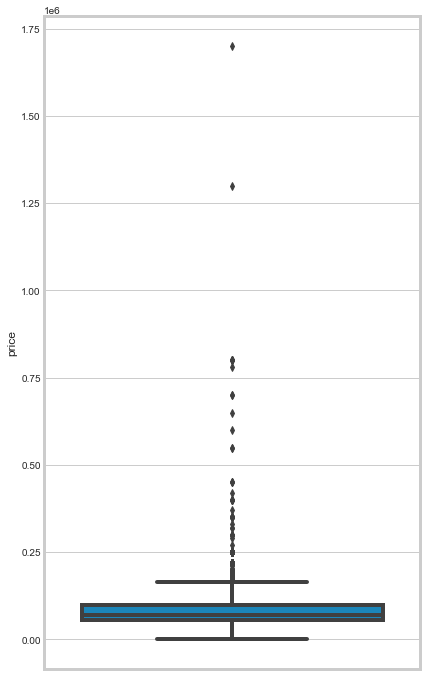

In [19]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,12))
sns.boxplot(y='price', data=df_house);

From the data filtering, statistics and boxplot, we can see using the boxplot that prices above 190,000 are outliers.


In [20]:
# create the variable to check how many opservations are above 200000
mask1 = (df_house.price > 200000) 
df_house[mask1].shape #check the no. of observations 

(129, 22)

since they represent 129 observations,which is around 3.4%  so I will remove them. 

In [22]:
# removing rows with price > 200000
df_h =df_house[df_house["price"]<200000]



In [23]:
#check the shape of the new df
df_h.shape

(3566, 22)

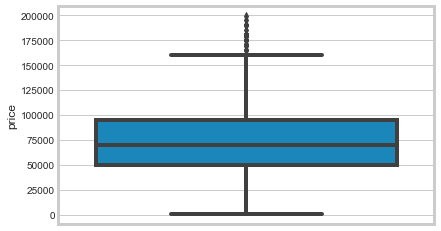

In [24]:
#ploting the price 
sns.boxplot(y='price', data=df_h);

In [ ]:
#check the statistics again after removing the outliers
df_h.describe()

In [25]:
df_h['price'].describe()

count      3566.000000
mean      77982.750421
std       37368.502957
min        1000.000000
25%       50000.000000
50%       70000.000000
75%       95000.000000
max      199000.000000
Name: price, dtype: float64

We noticed that the new df is less by  129 rows and mean and median are closer to each other with an average price of 77982

In [26]:
#the average price by city 
av_price=df_h.groupby('city')["price"].mean()
av_price

city
 الخبر     79482.530738
 الدمام    61653.026906
 الرياض    80075.064088
 جدة       92117.408575
Name: price, dtype: float64

From the above statestics , we can see that Jeddah has the highest average prices among the cities

In [27]:
df_h.groupby('city').mean() 

,size,property_age,bathrooms,kitchen,garage,driver_room,maid_room,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,Total_rooms
city,,,,,,,,,,,,,,,,,,,
الخبر,370.256148,5.878074,4.724385,0.802254,0.741803,0.365779,0.786885,0.015369,0.528689,0.473361,0.111680,0.843238,0.003074,0.726434,0.792008,0.000000,0.263320,79482.530738,7.597336
الدمام,327.016816,2.915919,4.608744,0.991031,0.831839,0.405830,0.804933,0.218610,0.571749,0.479821,0.058296,0.773543,0.003363,0.450673,0.816143,0.108744,0.159193,61653.026906,7.671525
الرياض,358.563536,5.840884,4.581215,0.910497,0.869613,0.470718,0.802210,0.090608,0.490608,0.418785,0.079558,0.792265,0.030939,0.290608,0.829834,0.028729,0.217680,80075.064088,6.788950
جدة,481.682219,5.576293,4.482976,0.934426,0.775536,0.744010,0.757881,0.105927,0.606557,0.730139,0.341740,0.773014,0.088272,0.548550,0.812106,0.194199,0.070618,92117.408575,7.158890


## Visual Exploratory Data Analysis (EDA)

In [28]:
# no of rentals per city
df_h['city'].value_counts()

 الخبر     976
 الرياض    905
 الدمام    892
 جدة       793
Name: city, dtype: int64

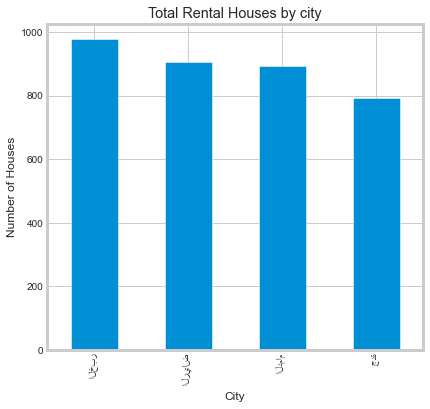

In [29]:
# no of rentals per city
plt.figure(figsize=(6,6))
df_h['city'].value_counts().plot(kind='bar')

plt.xlabel('City')
plt.ylabel('Number of Houses')
plt.title('Total Rental Houses by city');

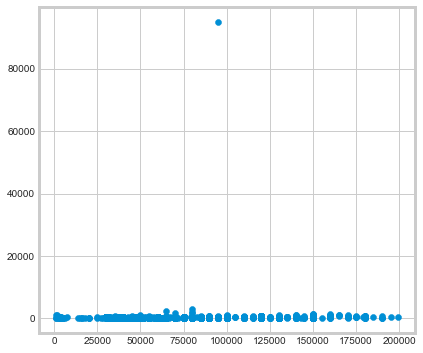

In [30]:
#check if there is a relation between size and price
plt.figure(figsize=(6,6))
plt.scatter(df_h['price'],df_h['size'] );

In [32]:
(df_h.sort_values(['city', 'price'], ascending=[True, False]).groupby('city').head(1))

,city,district,front,size,property_age,bathrooms,kitchen,garage,driver_room,maid_room,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,Total_rooms
2749,الخبر,حي الحزام الاخضر,جنوب شرقي,574,30,4,1,1,1,1,...,0,0,1,0,0,1,0,1,180000,5
1868,الدمام,حي الشاطئ الغربي,شرق,1000,9,5,1,1,1,1,...,1,1,1,0,0,0,0,0,165000,8
182,الرياض,حي المروج,شمال,250,3,3,1,1,1,1,...,0,1,1,0,1,0,0,0,190000,6
1246,جدة,حي الصفا,غرب,400,15,2,1,1,1,1,...,0,0,1,0,0,0,0,0,199000,7


from the above we can infer that prices of rentals tend to be less than 190000 in khobar and Dammam but exceed this in both Riyadh and Jeddah 

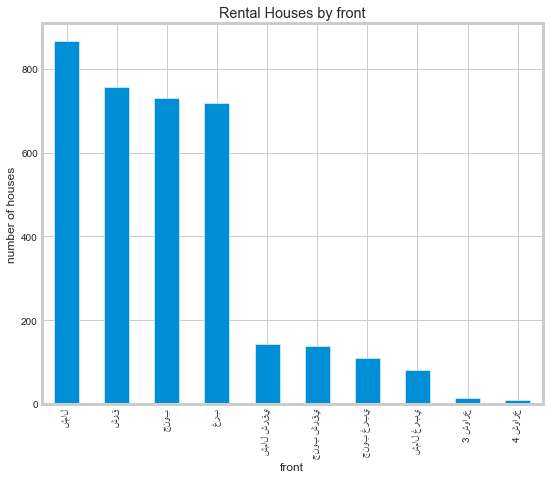

In [33]:
# no of rentals per city
plt.figure(figsize=(8,7))
df_h['front'].value_counts().plot(kind='bar')
plt.xlabel('front')
plt.ylabel('number of houses')
plt.title('Rental Houses by front');

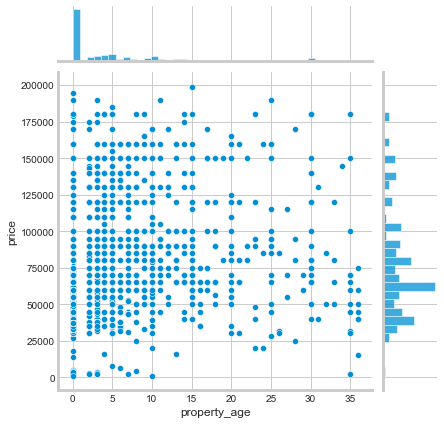

In [34]:
# newer properties, higher rent.
sns.jointplot(x='property_age', y='price', data= df_h);

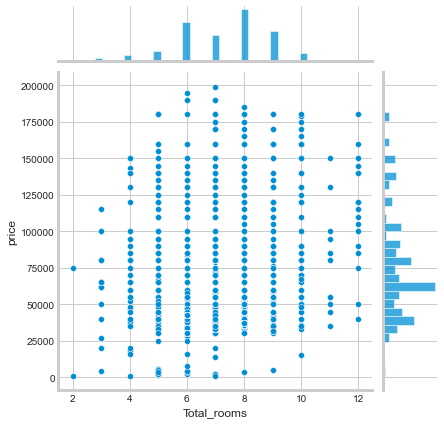

In [35]:
# newer properties, higher rent.
sns.jointplot(x='Total_rooms', y='price', data= df_h);

In [36]:
#Does property_age have impact on price?
df_h['property_age'].corr(df_h['price'])

0.2922876300697213

#### inspect the data further by querying the data.

find correlations using pandas “.corr()” function and can visualize the correlation matrix using a heatmap in seaborn.


In [87]:
# Get the correlations with 'price' sorted in descending order
df_h.corr()['price'].sort_values(ascending=False)

price           1.000000
log_price       0.905642
driver_room     0.470631
ac              0.356759
maid_room       0.305720
property_age    0.292288
basement        0.253431
pool            0.206110
stairs          0.160156
garage          0.137188
kitchen         0.102807
frontyard       0.086754
bathrooms       0.084461
furnished       0.055159
size            0.035000
Total_rooms     0.027135
elevator        0.024669
roof           -0.060356
fireplace      -0.081399
duplex         -0.106382
Name: price, dtype: float64

we have moderate correlation b/w price , the rest are week or no correlation

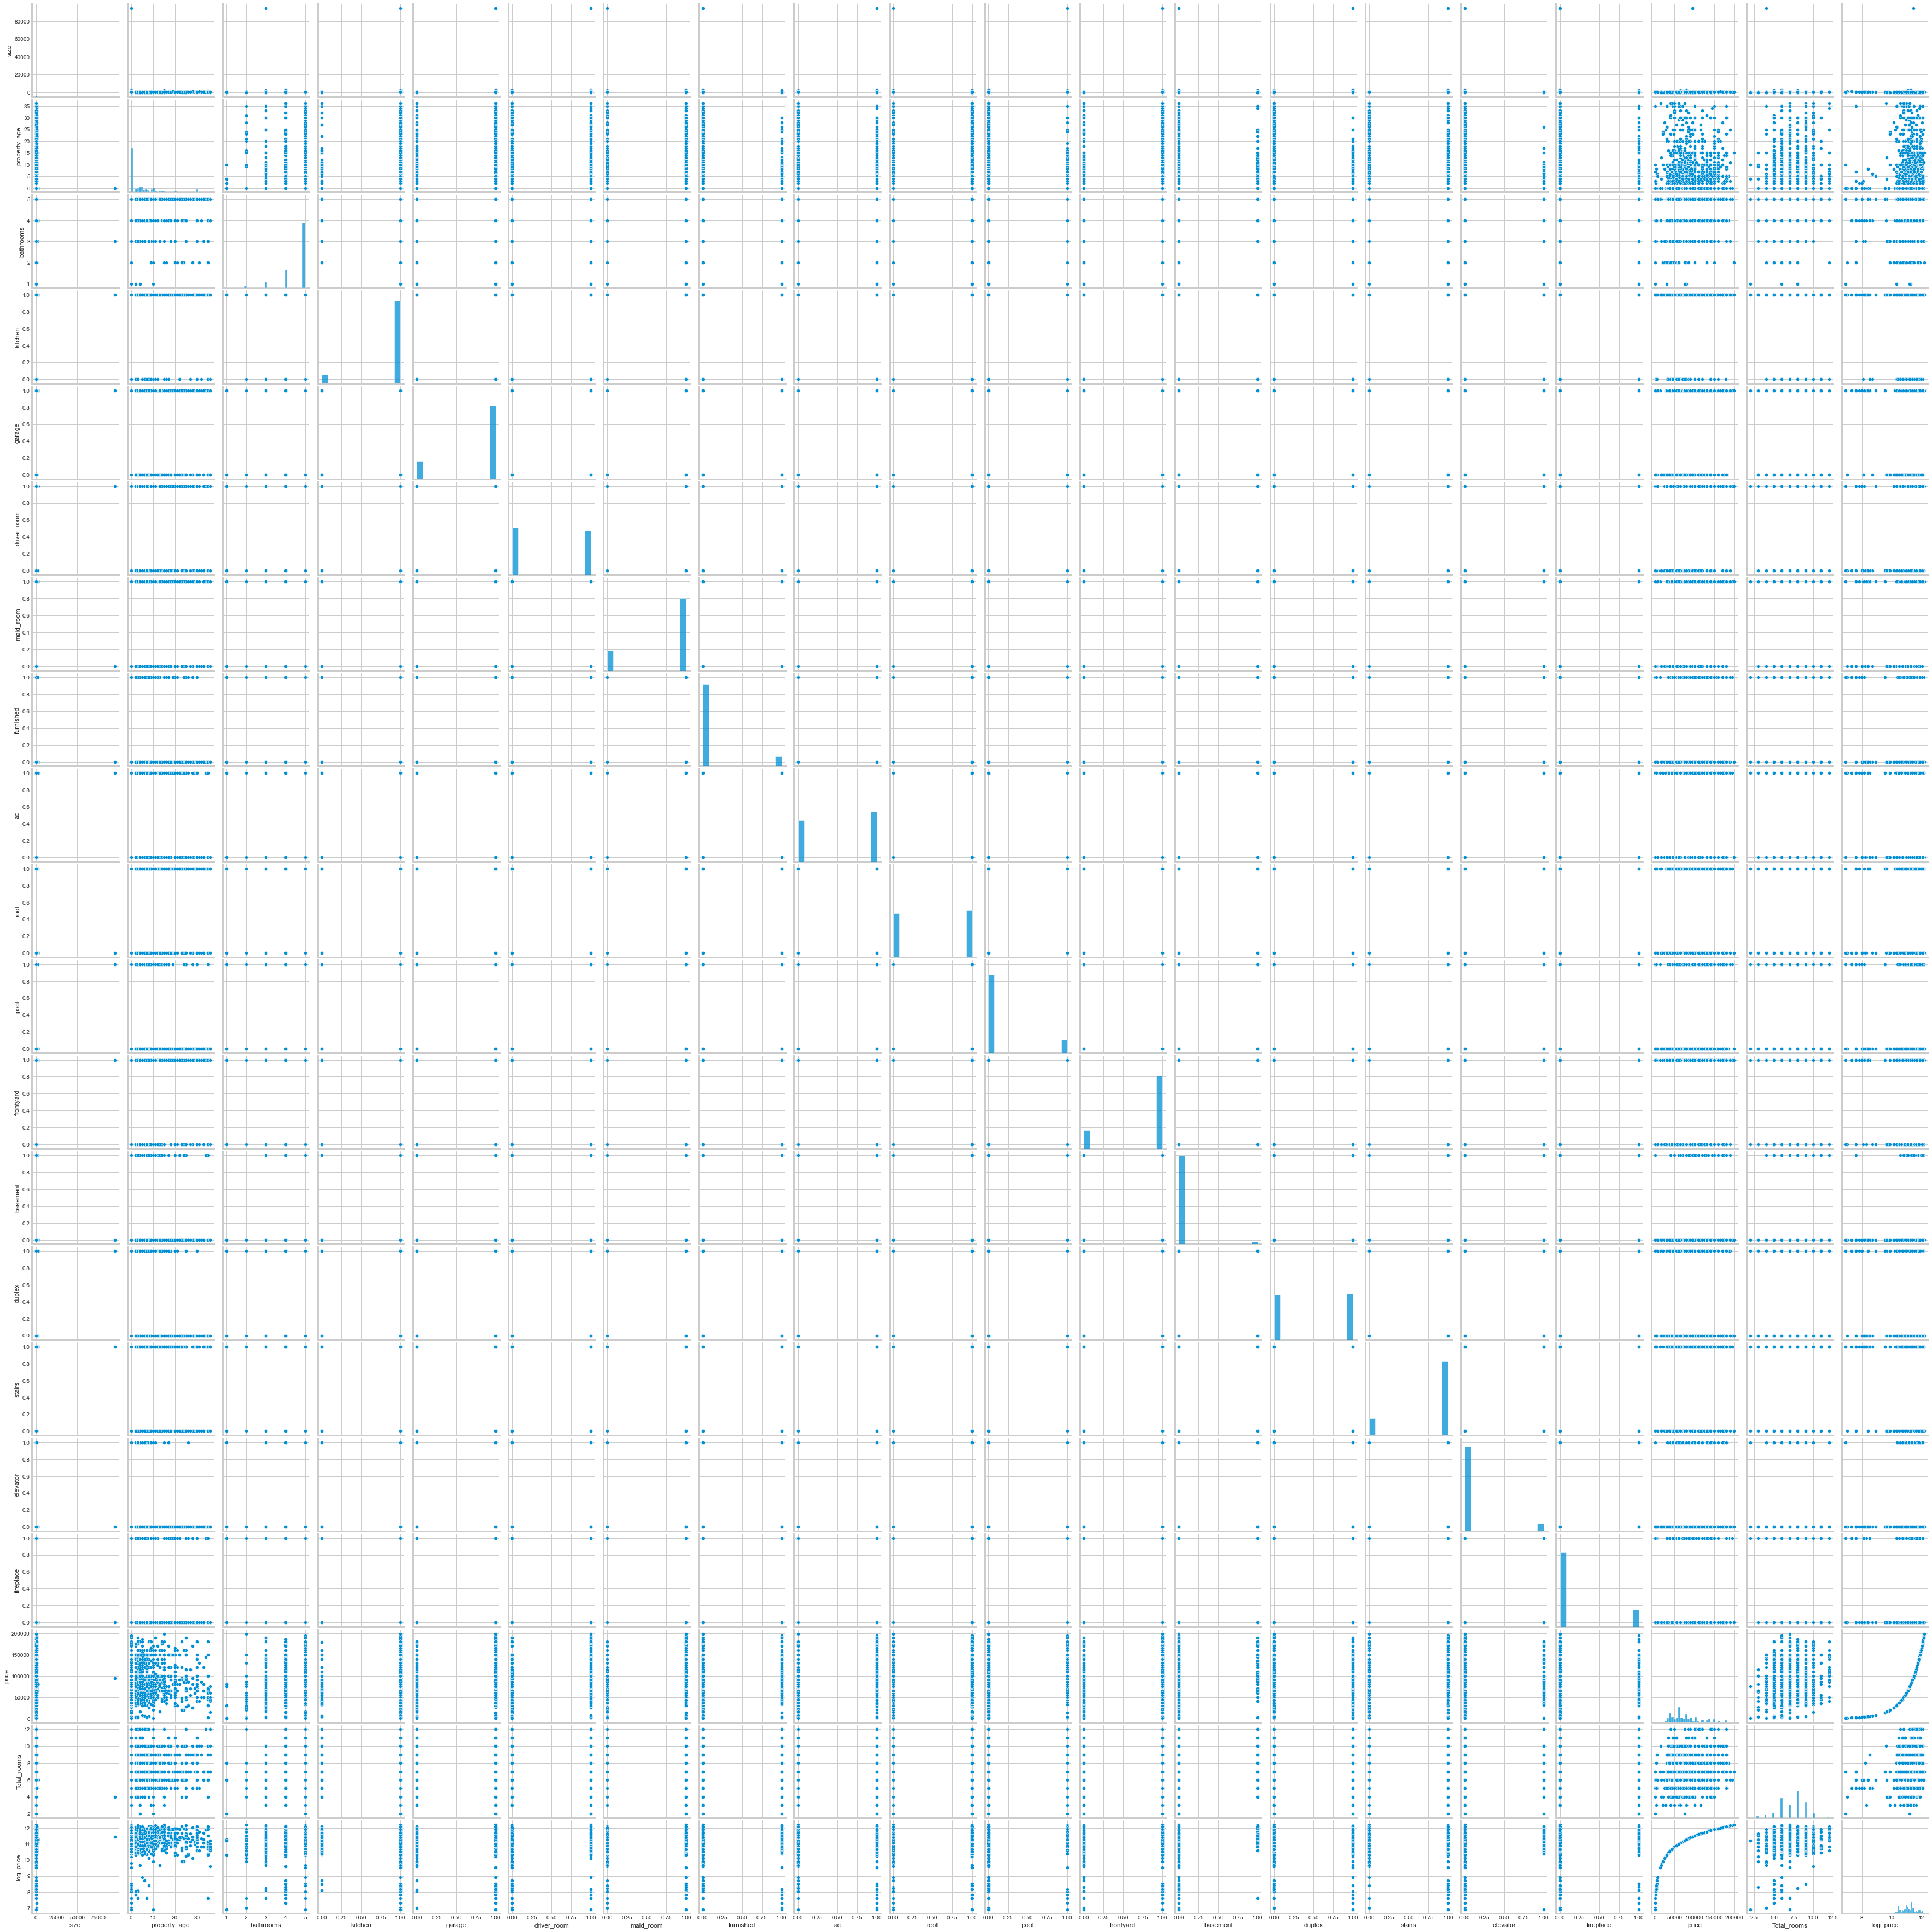

In [89]:
#To explore these types of relationships across the entire data set, I use  pairplot 
sns.pairplot(df_h);

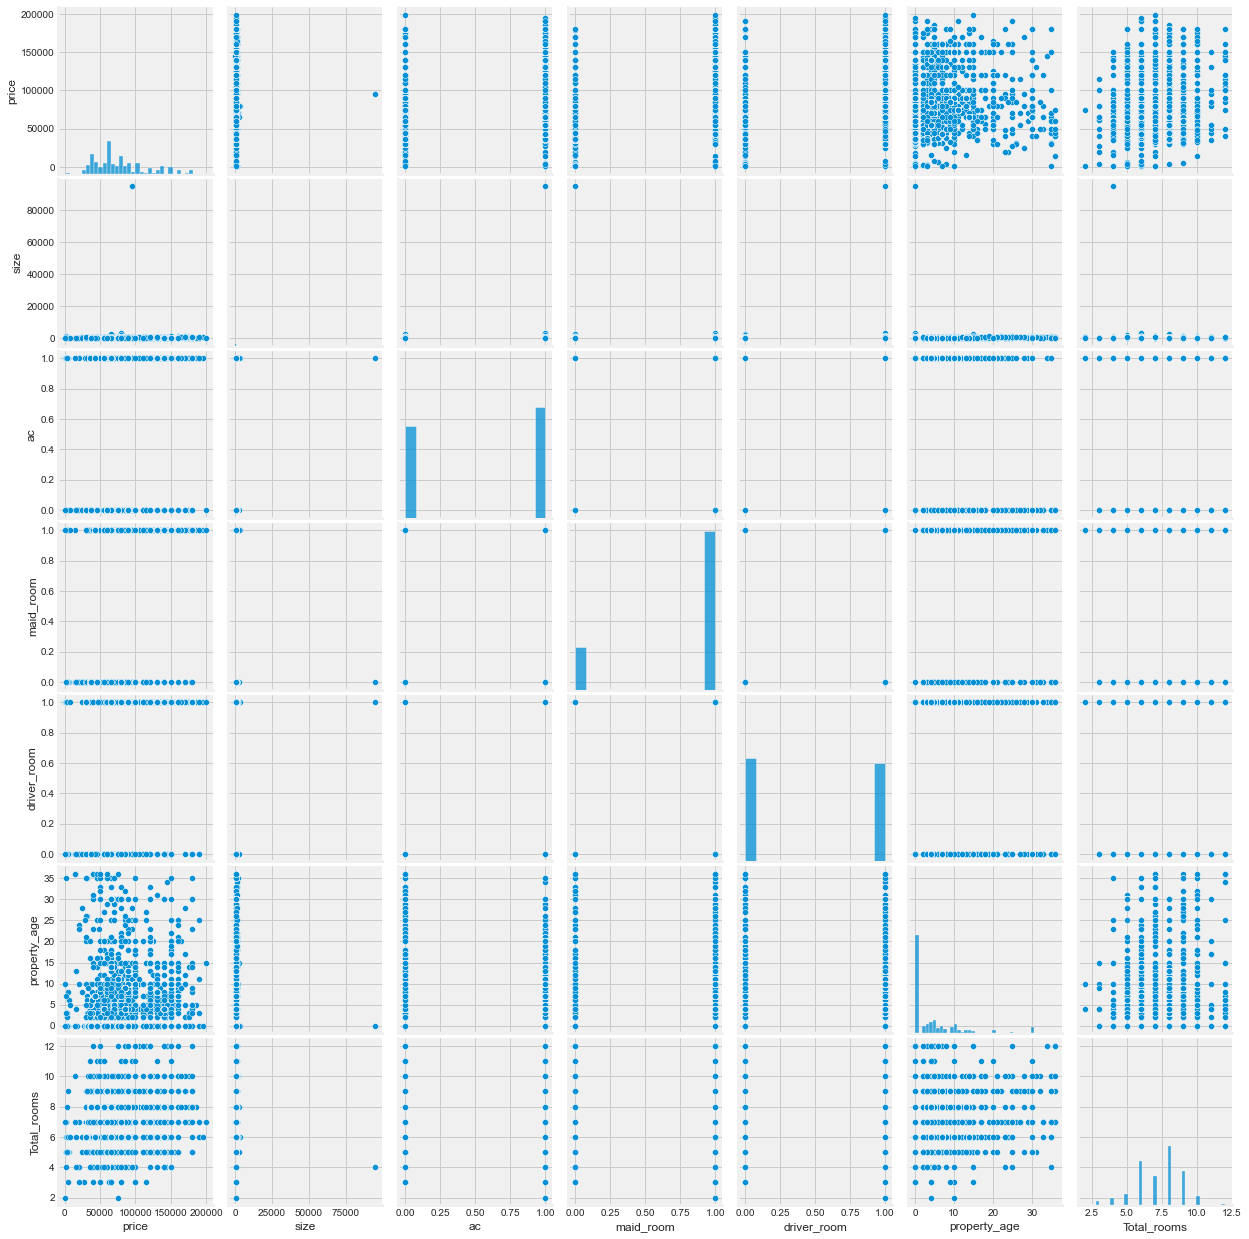

In [122]:
#To explore these types of relationships across the selected features, I use  pairplot 
sns.pairplot(df_h[['price', 'size', 'ac', 'maid_room', 'driver_room','property_age', 'Total_rooms', ]])

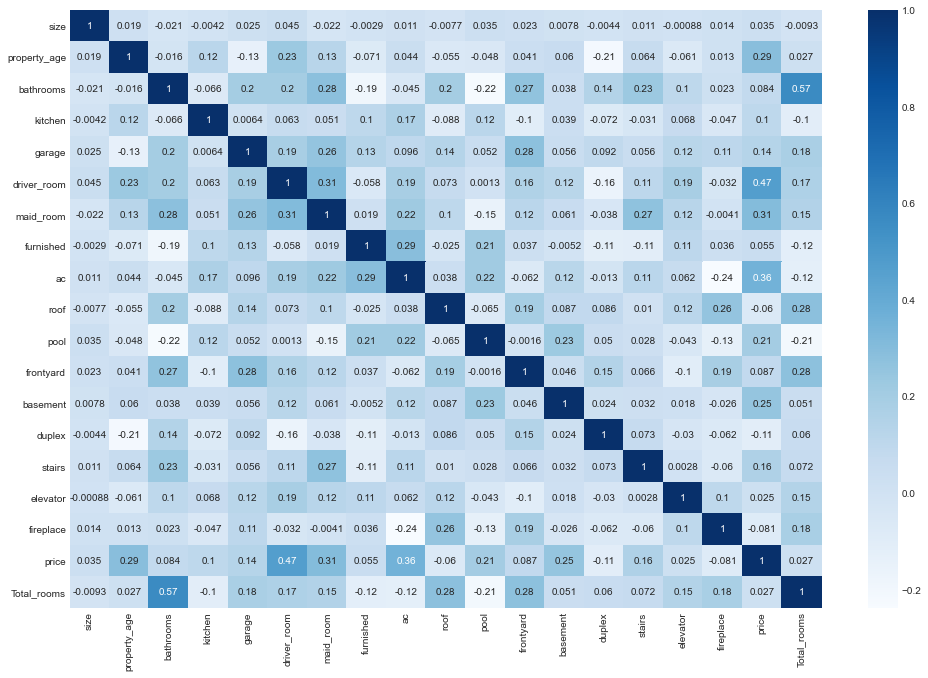

In [39]:
#check the Correlations using heatmap
plt.figure(figsize=(15,11))
sns.heatmap(df_h.corr(), cmap='Blues', annot=True);


Dark shades represents positive correlation while  lighter shades represents negative correlation.
The features are not coorelated.
we have moderate correlation b/w price and driver room, bbathroom and total rooms,the rest are week or no correlation


### Checking the target price and graph its distribution

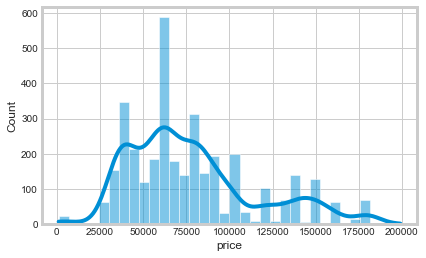

In [41]:
sns.histplot(df_h['price'], kde=True);

<ipython-input-40-9cc4fe09bfca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_h['log_price']=np.log(df_h.price)


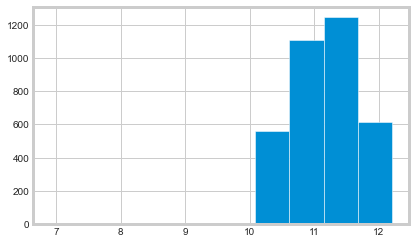

In [40]:
# take log of price and graph

df_h['log_price']=np.log(df_h.price)
# looks better
df_h.log_price.hist();

In [ ]:
##sns.boxplot(y='log_price', data=df_h);

#### Creating Dummy Variables

In [43]:
#dummies for categorical columns
city = pd.get_dummies(df_h["city"], drop_first= True)
district = pd.get_dummies(df_h["district"], drop_first= True)
front = pd.get_dummies(df_h["front"], drop_first= True)
Data_X = pd.concat([city,district,front],axis=1)
Data_y = df_h.log_price


# Modelling

## Train and Test the data 

The data will be split into training and testing sets. 
Set a variable X equal to the numerical features of the data and a variable y equal to the "price" column.

In [44]:
# importing the needed models
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [45]:
y = Data_y
x = Data_X

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


### Modeling with statsmodels using ols

In [88]:
# fit and summarize
lsm = smf.ols('log_price~ maid_room + property_age+ driver_room + ac ', data =  df_h)
fit1 = lsm.fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     380.5
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          3.83e-273
Time:                        01:44:29   Log-Likelihood:                -2164.3
No. Observations:                3566   AIC:                             4339.
Df Residuals:                    3561   BIC:                             4370.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       10.6359      0.017    613.918      0.000      10.602      10.670
maid_room        0.1948      0.020      9.971      0.000       0.157       0.233
property_age     0.0097      0.001      9.572      0.000       0.008       0.012
driver_room      0.3143      0.016     19.481      0.000       0.283       0.346
ac               0.2781      0.015     17.980      0.000       0.248       0.308
==============================================================================
Omnibus:                     2277.420   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            61466.832
Skew:                          -2.594   Prob(JB):                         0.00
Kurtosis:                      22.666   Cond. No.                         29.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

based on the above, R2 should be .299, which is bad. That means the price can not be explained properly since we can only explain  30.% of the variance in price with this model.

In [106]:
# adjust to check if we can improve R^2
lsm2 = smf.ols('log_price~ driver_room ', data =  df_h)
fit2 = lsm2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     782.6
Date:                Thu, 18 Nov 2021   Prob (F-statistic):          7.26e-156
Time:                        08:39:32   Log-Likelihood:                -2444.8
No. Observations:                3566   AIC:                             4894.
Df Residuals:                    3564   BIC:                             4906.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      10.9245      0.011    973.003      0.000      10.903      10.947
driver_room     0.4503      0.016     27.976      0.000       0.419       0.482
==============================================================================
Omnibus:                     1872.197   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32103.647
Skew:                          -2.099   Prob(JB):                         0.00
Kurtosis:                      17.087   Cond. No.                         2.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS is not a good model for this dataset since it can not explain variation in price

### Linear Regression

Create an instance of a LinearRegression() model named lm.

In [51]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [107]:
scal = StandardScaler()
X_train = scal.fit_transform(X_train)
X_test = scal.fit_transform(X_test)

** Train/fit lm on the training data.**

In [108]:
lm.fit(X_train,y_train)
lm.score(X_train, y_train)

0.6677189803340526

#### Predicting Test Data

In [115]:
y_predt = lm.predict( X_test)

In [116]:
print('R-squared train score: {:.3f}'.format(lm.score(X_train, y_train)))
print('R-squared test score: {:.3f}'.format(lm.score(X_test, y_test)))

R-squared train score: 0.668
R-squared test score: -447769040233609387174789120.000


Text(0, 0.5, 'y_pred')

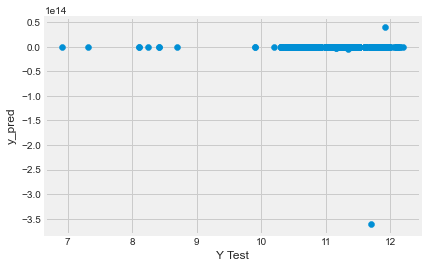

In [117]:
#** Create a scatterplot of the real test values versus the predicted values. **
plt.scatter(y_test,y_predt)
plt.xlabel('Y Test')
plt.ylabel('y_pred')


In [111]:
adjusted_r_squared_1 = 1 - (1-(0.4582462275381046))*(len(Data_y)-1)/(len(Data_y)-Data_X.shape[1]-1) # this is constant
adjusted_r_squared_1 # Calculate Adj.R^2

0.4289319341139394

In [ ]:
the Adj r square tillus that the model can not predict properly the target variable 

In [118]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predt))
print('MSE:', metrics.mean_squared_error(y_test, y_predt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predt)))

MAE: 698459908601.0764
MSE: 1.2390208638786741e+26
RMSE: 11131131406459.426


#### Ridge Regression

In [119]:
#trying another model to comapre the result

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)

y_predr=ridge.predict(X_test)

print('R-squared train score: {:.3f}'.format(ridge.score(X_train, y_train)))
print('R-squared test score: {:.3f}'.format(ridge.score(X_test, y_test)))

R-squared train score: 0.668
R-squared test score: 0.538


In [120]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predr))
print('MSE:', metrics.mean_squared_error(y_test, y_predr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predr)))

MAE: 0.19672334986125883
MSE: 0.12779510365096367
RMSE: 0.3574844103607368


### what are the findings or conclosion?

From the above we can see that the model is underfitted and the data or features se are not a good predictor of the price 